In [14]:
import requests

def fetch(url):
    print(f'Fetching {url}')
    response = requests.get(url)
    data = response.json()
    return data['results'], data['next']


districts = []
url = 'https://michiganelections.io/api/districts/'
while url:
    results, url = fetch(url)
    districts.extend(results)
    
print(f'Fetched {len(districts)} districts')

Fetching https://michiganelections.io/api/districts/
Fetching http://michiganelections.io/api/districts/?limit=100&offset=100
Fetching http://michiganelections.io/api/districts/?limit=100&offset=200
Fetching http://michiganelections.io/api/districts/?limit=100&offset=300
Fetching http://michiganelections.io/api/districts/?limit=100&offset=400
Fetching http://michiganelections.io/api/districts/?limit=100&offset=500
Fetching http://michiganelections.io/api/districts/?limit=100&offset=600
Fetching http://michiganelections.io/api/districts/?limit=100&offset=700
Fetching http://michiganelections.io/api/districts/?limit=100&offset=800
Fetching http://michiganelections.io/api/districts/?limit=100&offset=900
Fetching http://michiganelections.io/api/districts/?limit=100&offset=1000
Fetching http://michiganelections.io/api/districts/?limit=100&offset=1100
Fetching http://michiganelections.io/api/districts/?limit=100&offset=1200
Fetching http://michiganelections.io/api/districts/?limit=100&offset

In [19]:
districts[0]

{'url': 'http://michiganelections.io/api/districts/4/',
 'id': 4,
 'category': 'County Commissioner District',
 'name': '15th District'}

In [47]:
from collections import defaultdict

district_count = defaultdict(int)

for district in districts:
    category = district['category']
    if category != 'Jurisdiction':
        district_count[category] += 1
    
district_count

defaultdict(int,
            {'County Commissioner District': 16,
             'Court of Appeals District': 8,
             'District Court District': 65,
             'Intermediate School District': 16,
             'Probate Court District': 71,
             'School District': 18,
             'State House District': 110,
             'State Senate District': 38,
             'US Congress District': 14,
             'County': 81,
             'Circuit Court District': 52,
             'Library District': 30,
             'State District': 1,
             'City': 3,
             'Township': 2,
             'School District District': 1,
             'Community College District': 29,
             'Probate District Court District': 6,
             'Local School District': 527,
             'Village District': 235,
             'District Library District': 4})

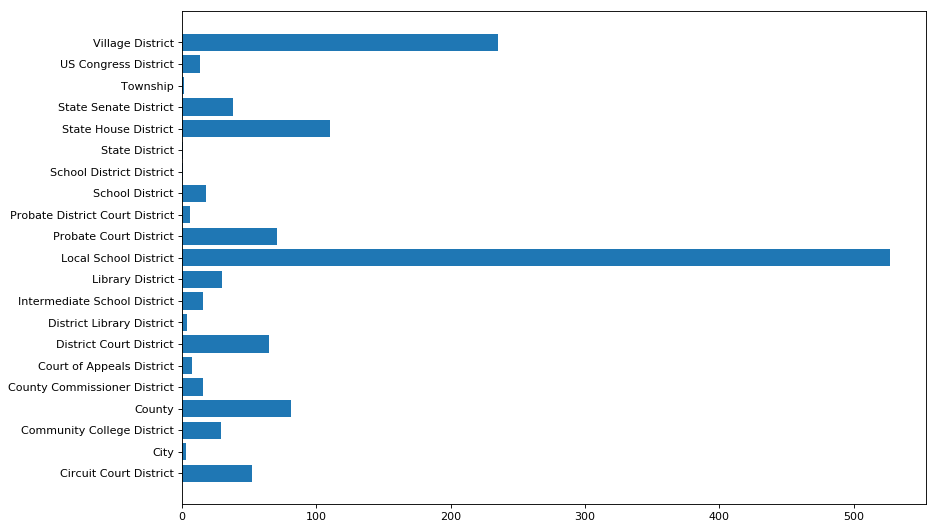

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

x, y = zip(*sorted(district_count.items()))

plt.barh(x, y)
plt.show()